<a href="https://colab.research.google.com/github/guilhermelaviola/FavoriteActorsAnalysis/blob/main/FavoriteActorsAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing all the necessary libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, FFMpegWriter
sns.set(style = 'darkgrid')
plt.style.use('seaborn-pastel')

<ipython-input-1-5ddc9a2f5ebc>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


In [2]:
# Importing and displaying the dataset:
actors = pd.read_excel('My favorites.xlsx')
actors.head()

,Name,Birth Day and Month,Birth Year
0,Cuba Gooding Jr.,1968-01-02 00:00:00,1968
1,Mel Gibson,1956-01-03 00:00:00,1956
2,Robert Duvall,1931-01-05 00:00:00,1931
3,Diane Keaton,1946-01-05 00:00:00,1946
4,Clancy Brown,1959-01-05 00:00:00,1959


In [3]:
# Displaying the number of rows and columns in the dataset:
actors.shape

(277, 3)

In [4]:
# Converting the data from 'Birth Day and Month' to datetime:
actors['Birth Day and Month'] = actors['Birth Day and Month'].map(pd.to_datetime)

# Creating 3 new columns in the dataset based on the datetime object:
actors['Day'] = actors['Birth Day and Month'].apply(lambda x : x.day)
actors['Month'] = actors['Birth Day and Month'].apply(lambda x : x.month)
actors['Year'] = actors['Birth Day and Month'].apply(lambda x : x.year)

#Displaying the dataset after the change:
print(actors.head())

               Name Birth Day and Month  Birth Year  Day  Month  Year
0  Cuba Gooding Jr.          1968-01-02        1968    2      1  1968
1        Mel Gibson          1956-01-03        1956    3      1  1956
2     Robert Duvall          1931-01-05        1931    5      1  1931
3      Diane Keaton          1946-01-05        1946    5      1  1946
4      Clancy Brown          1959-01-05        1959    5      1  1959


In [5]:
# Renaming some columns and diplaying the dataset after the change:
actors.columns = ['Name', 'Birth date', 'Birth Year', 'Day', 'Month', 'Year']
actors.head()

,Name,Birth date,Birth Year,Day,Month,Year
0,Cuba Gooding Jr.,1968-01-02,1968,2,1,1968
1,Mel Gibson,1956-01-03,1956,3,1,1956
2,Robert Duvall,1931-01-05,1931,5,1,1931
3,Diane Keaton,1946-01-05,1946,5,1,1946
4,Clancy Brown,1959-01-05,1959,5,1,1959


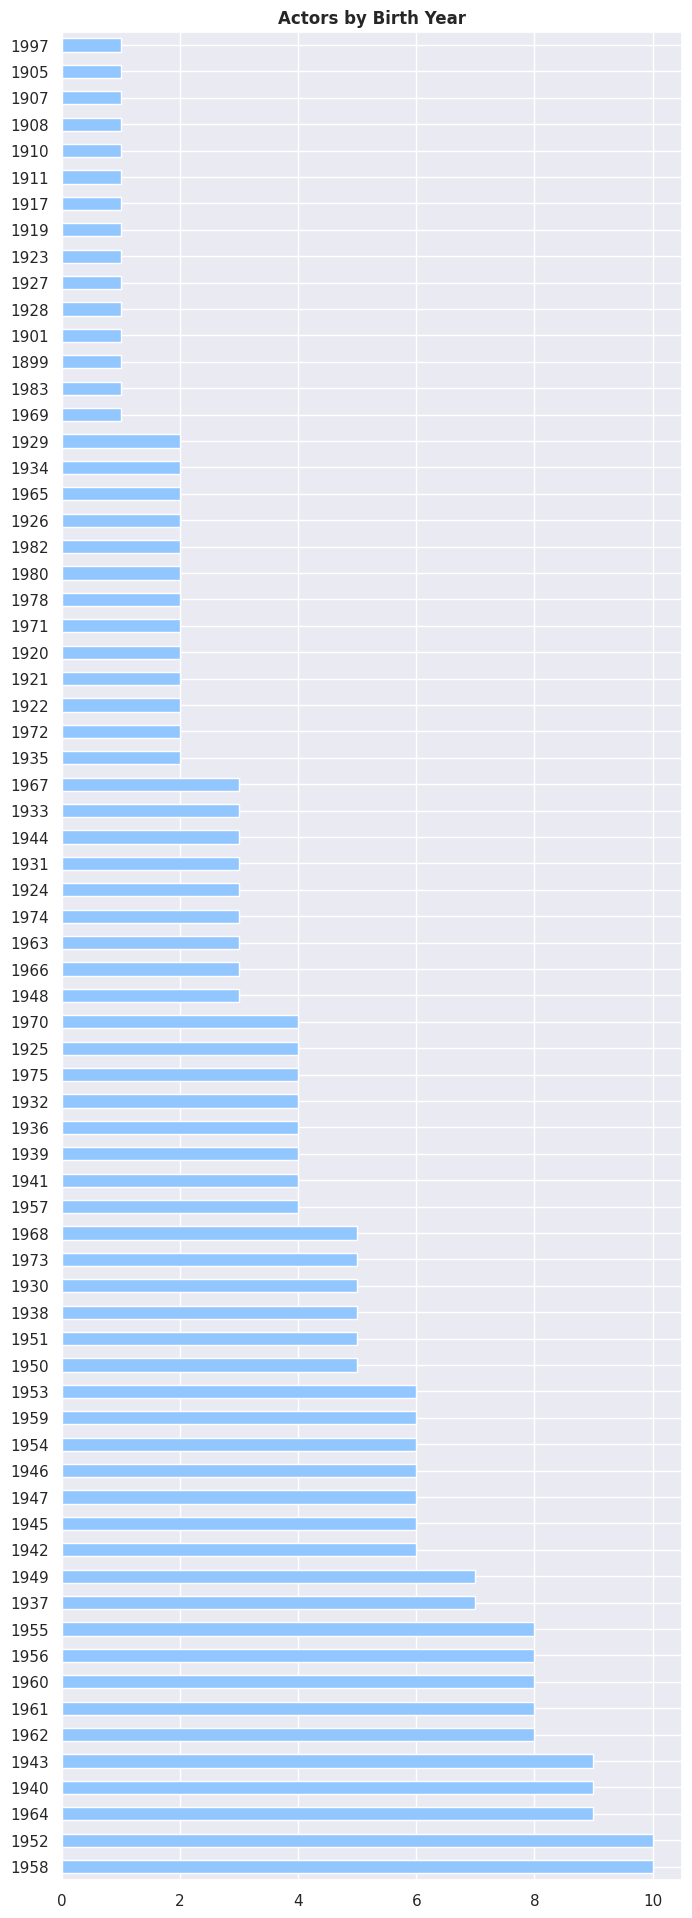

In [8]:
# Displaying actors by birth year:
actors.groupby('Birth date').first()['Birth Year'].value_counts().plot(kind = 'barh', figsize = (8, 24))
plt.ylabel(None)
plt.title('Actors by Birth Year', fontweight = 'bold')
plt.show()

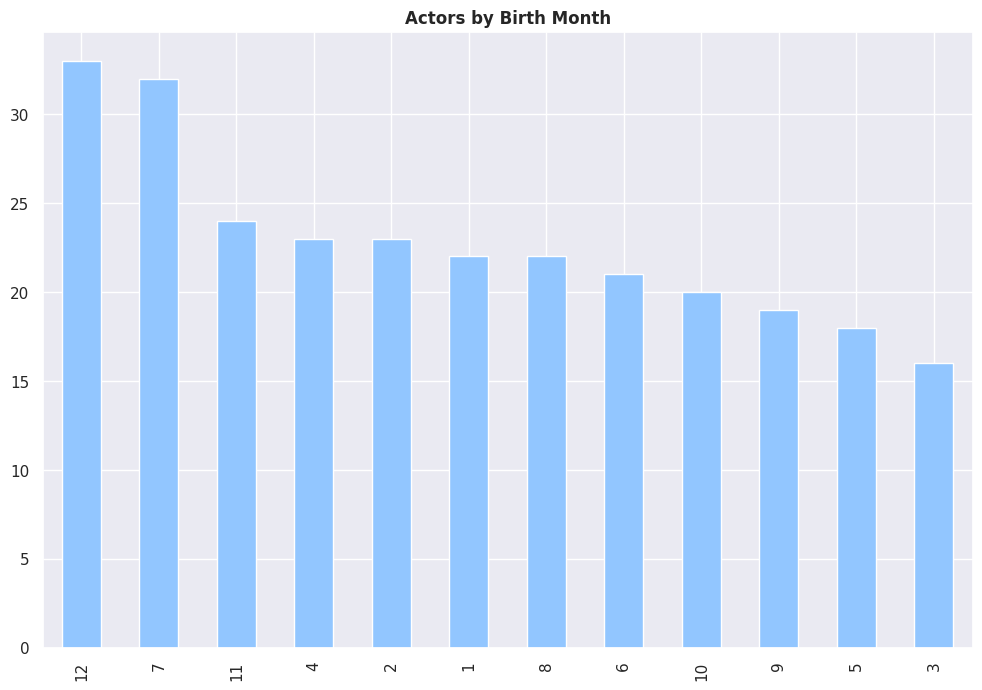

In [10]:
# Displaying actors by birth month:
actors.groupby('Birth date').first()['Month'].value_counts().plot(kind = 'bar', figsize = (12, 8))
plt.ylabel(None)
plt.title('Actors by Birth Month', fontweight = 'bold')
plt.show()

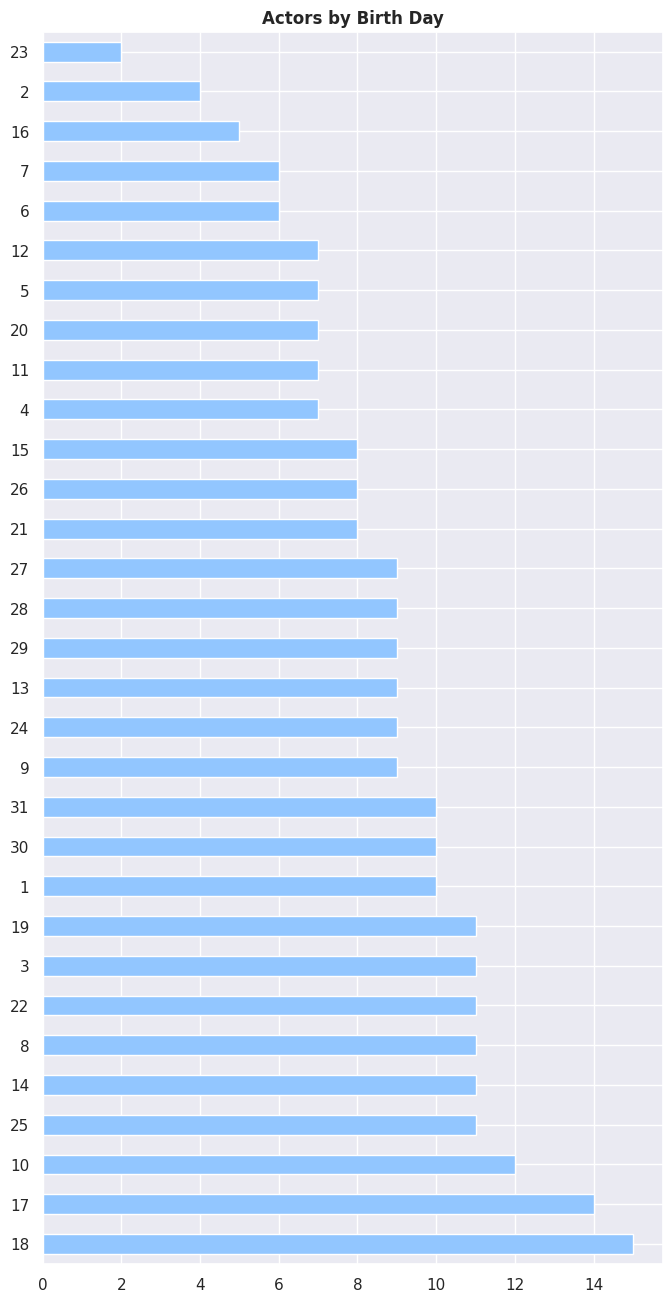

In [11]:
# Displaying actors by birth day (of the month):
actors.groupby('Birth date').first()['Day'].value_counts().plot(kind = 'barh', figsize = (8, 16))
plt.ylabel(None)
plt.title('Actors by Birth Day', fontweight = 'bold')
plt.show()

In [12]:
# Grouping the Birth Date Year by decade:
def group_by_decade(year):
  if year >= 1800 and year <= 1899:
    result = '1800s'
  elif year >= 1900 and year <= 1909:
    result = '1900s'
  elif year >= 1910 and year <= 1919:
    result = '1910s'
  elif year >= 1920 and year <= 1929:
    result = '1920s'
  elif year >= 1930 and year <= 1939:
    result = '1930s'
  elif year >= 1940 and year <= 1949:
    result = '1940s'
  elif year >= 1950 and year <= 1959:
    result = '1950s'
  elif year >= 1960 and year <= 1969:
    result = '1960s'
  elif year >= 1970 and year <= 1979:
    result = '1970s'
  elif year >= 1980 and year <= 1989:
    result = '1980s'
  elif year >= 1990 and year <= 1999:
    result = '1990s'
  elif year >= 2000 and year <= 2009:
    result = '2000s'
  else:
    result = 'Not classified'
  return result

# Creating a new column named 'Decade', that will be filled with data based on the
# 'Year' column, but grouped by decade
actors['Decade'] = actors['Year'].apply(group_by_decade)

# Displaying the dataset after the change:
actors.head()

,Name,Birth date,Birth Year,Day,Month,Year,Decade
0,Cuba Gooding Jr.,1968-01-02,1968,2,1,1968,1960s
1,Mel Gibson,1956-01-03,1956,3,1,1956,1950s
2,Robert Duvall,1931-01-05,1931,5,1,1931,1930s
3,Diane Keaton,1946-01-05,1946,5,1,1946,1940s
4,Clancy Brown,1959-01-05,1959,5,1,1959,1950s


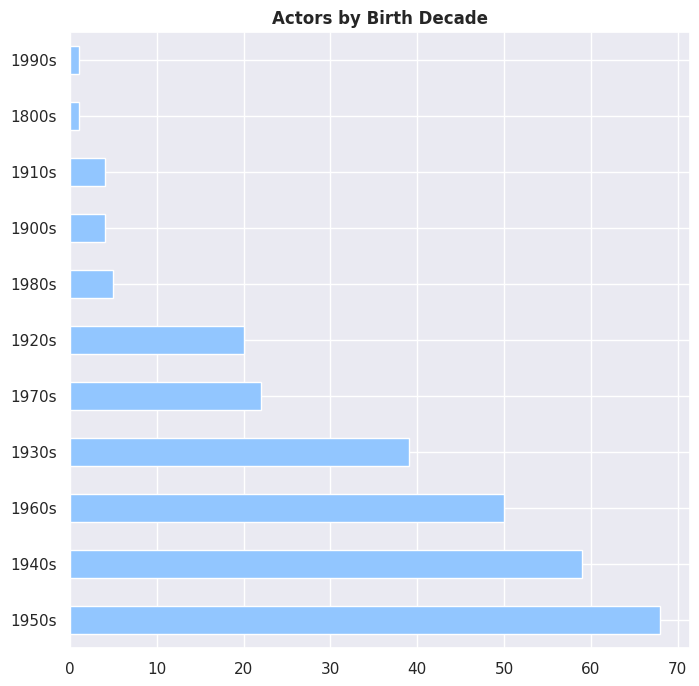

In [14]:
# Displaying actors by birth decade:
actors.groupby('Birth date').first()['Decade'].value_counts().plot(kind = 'barh', figsize = (8, 8))
plt.ylabel(None)
plt.title('Actors by Birth Decade', fontweight = 'bold')
plt.show()